In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
shopping=pd.read_excel("Online_Retail_Subset.xlsx")
shopping.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [3]:
a=shopping["Country"].value_counts()

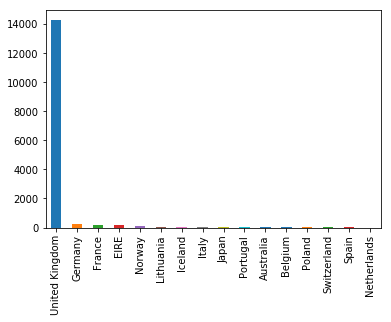

In [4]:
a.plot(kind="bar")
plt.show()

In [5]:
a

United Kingdom    14234
Germany             213
France              167
EIRE                145
Norway               73
Lithuania            34
Iceland              31
Italy                25
Japan                16
Portugal             14
Australia            14
Belgium              12
Poland                8
Switzerland           6
Spain                 5
Netherlands           2
Name: Country, dtype: int64

In [6]:
shopping.isna().sum()

InvoiceNo         0
StockCode         0
Description      60
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     4271
Country           0
dtype: int64

In [7]:
shopping=shopping.dropna()

In [8]:
shopping.shape

(10728, 8)

In [9]:
shopping.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Quantity


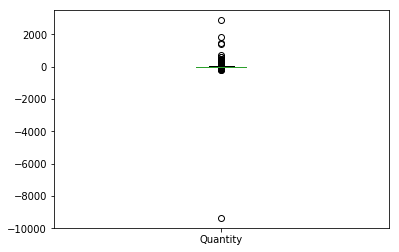

In [10]:
for i in shopping.columns:
    if (i == "Quantity"):
        print(i)
        shopping[i].plot(kind="box")
        plt.show()

In [11]:

shopping=shopping[(shopping["Quantity"]>0)]

In [12]:
shopping.shape

(10577, 8)

In [13]:
x=shopping.groupby('Country')["CustomerID"].count()
x

Country
Australia           14
Belgium             12
EIRE               132
France             167
Germany            197
Iceland             31
Italy               24
Japan               16
Lithuania           34
Netherlands          2
Norway              73
Poland               8
Portugal            14
Spain                5
Switzerland          6
United Kingdom    9842
Name: CustomerID, dtype: int64

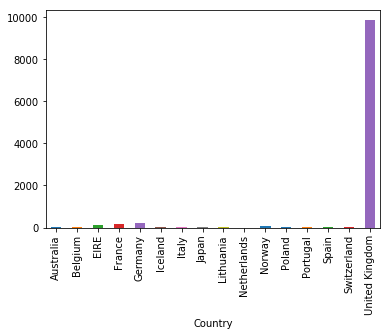

In [14]:
x.plot(kind="bar")
plt.show()

In [15]:
shopping["UnitPrice"].value_counts()

1.25      1257
2.95      1007
2.10       912
1.65       877
0.85       844
3.75       703
0.42       470
1.95       423
2.55       402
4.95       396
4.25       312
1.45       295
5.95       254
7.95       254
0.65       223
9.95       180
8.50       177
0.55       151
1.69       108
6.75        97
12.75       94
1.06        92
4.65        90
0.29        87
3.39        79
3.95        68
1.85        58
6.95        46
3.25        45
0.95        45
          ... 
15.00        2
11.95        2
15.95        2
3.37         2
26.95        2
0.32         2
10.75        2
1.48         2
165.00       1
4.60         1
1.93         1
79.95        1
40.00        1
0.10         1
0.00         1
1.00         1
49.95        1
3.82         1
6.60         1
0.24         1
3.21         1
295.00       1
1.05         1
42.95        1
35.00        1
21.95        1
0.07         1
7.25         1
0.53         1
0.30         1
Name: UnitPrice, Length: 98, dtype: int64

In [16]:
shopping=shopping[((shopping["UnitPrice"]>0))]

In [17]:
shopping.shape

(10576, 8)

In [18]:
shopping['Purchase']=shopping['UnitPrice']*shopping['Quantity']

In [19]:
shopping.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Purchase
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [20]:
from sklearn import preprocessing

In [21]:
le=preprocessing.LabelEncoder()
shopping["Country"]=le.fit_transform(shopping["Country"])

In [23]:
from sklearn.model_selection import train_test_split
feature=shopping.loc[:,["InvoiceNo","Quantity","UnitPrice","Country","Purchase"]]

shopping_train,shopping_test=train_test_split(feature,test_size=0.40,random_state=0)
display(shopping_train.shape)
display(shopping_test.shape)

(6345, 5)

(4231, 5)

In [24]:
from sklearn.decomposition import PCA
pca=PCA()

In [25]:
shopping_train=pca.fit_transform(shopping_train)
shopping_test=pca.transform(shopping_test)

In [26]:
explained_variance=pca.explained_variance_ratio_

In [27]:
explained_variance

array([9.57910033e-01, 3.18303681e-02, 1.01130554e-02, 8.73085101e-05,
       5.92350982e-05])

In [28]:
pca=PCA(n_components=3)

In [29]:
shopping_train=pca.fit_transform(shopping_train)
shopping_test=pca.transform(shopping_test)

In [30]:
explained_variance=pca.explained_variance_ratio_

In [31]:
explained_variance

array([0.95791003, 0.03183037, 0.01011306])

In [32]:
shopping_df=shopping.loc[:,["InvoiceNo","Purchase","Country"]]
shopping_df.head()

,InvoiceNo,Purchase,Country
0,536365,15.30,15
1,536365,20.34,15
2,536365,22.00,15
3,536365,20.34,15
4,536365,20.34,15


In [33]:
from sklearn.cluster import KMeans  
kmeans = KMeans(n_clusters=3)
kmeans.fit(shopping_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [34]:
kmeans.cluster_centers_

array([[5.37119244e+05, 1.53933159e+01, 1.39269202e+01],
       [5.36621794e+05, 2.38226857e+01, 1.46131140e+01],
       [5.37448431e+05, 1.88001736e+01, 1.42987603e+01]])

In [35]:
print (kmeans.labels_)
print (len(kmeans.labels_))

[1 1 1 ... 2 2 2]
10576


In [36]:
print (type(kmeans.labels_))
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique, counts)))

<class 'numpy.ndarray'>
{0: 4023, 1: 4133, 2: 2420}


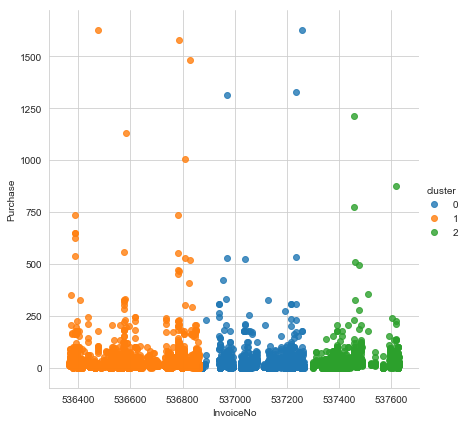

In [37]:
shopping_df['cluster'] = kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot('InvoiceNo','Purchase',data=shopping_df, hue='cluster',size=6,aspect=1,fit_reg=False)    